<>:6: SyntaxWarning: invalid escape sequence '\O'
<>:57: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\O'
<>:57: SyntaxWarning: invalid escape sequence '\c'
C:\Users\TGDD-ASUS\AppData\Local\Temp\ipykernel_17328\2994750055.py:6: SyntaxWarning: invalid escape sequence '\O'
  file_path = "..\OnlineRetail.xlsx"  # thay bằng đường dẫn tới file của bạn
C:\Users\TGDD-ASUS\AppData\Local\Temp\ipykernel_17328\2994750055.py:57: SyntaxWarning: invalid escape sequence '\c'
  basket_sets.to_csv("..\cleaned_basket.csv")


Kích thước dữ liệu ban đầu: (541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


C:\Users\TGDD-ASUS\AppData\Local\Temp\ipykernel_17328\2994750055.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Kích thước bảng giao dịch sau khi mã hóa: (16649, 3833)
Description  10 colour spaceboy pen  12 coloured party balloons  \
InvoiceNo                                                         
536365                            0                           0   
536366                            0                           0   
536367                            0                           0   
536368                            0                           0   
536369                            0                           0   

Description  12 daisy pegs in wood box  12 egg house painted wood  \
InvoiceNo                                                           
536365                               0                          0   
536366                               0                          0   
536367                               0                          0   
536368                               0                          0   
536369                               0                      

C:\Users\TGDD-ASUS\AppData\Local\Temp\ipykernel_17328\2994750055.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values, y=product_counts.index, palette="Blues_d")


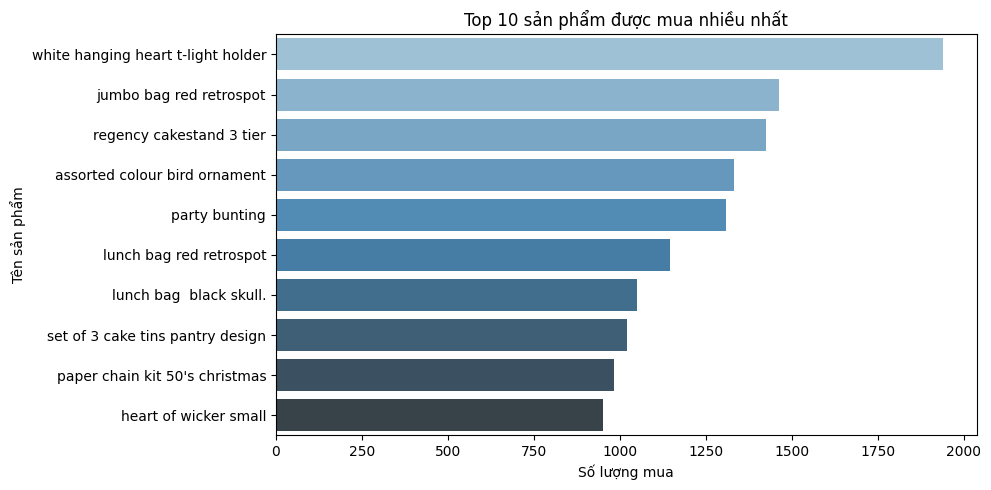

Hoàn tất tiền xử lý dữ liệu. Dữ liệu sẵn sàng cho bước áp dụng Apriori.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  ĐỌC DỮ LIỆU
file_path = "..\OnlineRetail.xlsx"  # thay bằng đường dẫn tới file của bạn
df = pd.read_excel(file_path)

print("Kích thước dữ liệu ban đầu:", df.shape)
print(df.head())

# BƯỚC 3. LÀM SẠCH DỮ LIỆU

# Loại bỏ dòng thiếu giá trị mô tả sản phẩm hoặc mã khách hàng
df.dropna(subset=['Description', 'CustomerID'], inplace=True)

# Loại bỏ hóa đơn bị hủy (InvoiceNo bắt đầu bằng 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Lọc dữ liệu theo khu vực United Kingdom
df = df[df['Country'] == 'United Kingdom']

# Chuẩn hóa tên sản phẩm: chữ thường, xóa khoảng trắng dư
df['Description'] = df['Description'].str.strip().str.lower()

# BƯỚC 4. TẠO BẢNG GIAO DỊCH (TRANSACTION TABLE)
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))

# Chuyển thành ma trận nhị phân (1 = có mua, 0 = không)
def encode_units(x):
    return 1 if x > 0 else 0

basket_sets = basket.applymap(encode_units)

print("Kích thước bảng giao dịch sau khi mã hóa:", basket_sets.shape)
print(basket_sets.head())

# 
# THỐNG KÊ & TRỰC QUAN HÓA DỮ LIỆU

# Đếm số lần mua mỗi sản phẩm
product_counts = df['Description'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=product_counts.values, y=product_counts.index, palette="Blues_d")
plt.title("Top 10 sản phẩm được mua nhiều nhất")
plt.xlabel("Số lượng mua")
plt.ylabel("Tên sản phẩm")
plt.tight_layout()
plt.show()


# LƯU DỮ LIỆU SAU TIỀN XỬ LÝ 

basket_sets.to_csv("..\cleaned_basket.csv")

print("Hoàn tất tiền xử lý dữ liệu. Dữ liệu sẵn sàng cho bước áp dụng Apriori.")
